In [5]:
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u
from astropy.io import fits
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astropy.visualization import simple_norm
import regions
from regions import Regions


In [23]:
cd ..

/blue/adamginsburg/savannahgramze/cloudc/lactea-filament/lactea-filament


In [24]:
from jwst_plots import make_cat_use, JWSTCatalog
import cutout_manager as cm

In [25]:
cd notebooks/

/blue/adamginsburg/savannahgramze/cloudc/lactea-filament/lactea-filament/notebooks


In [9]:
basepath = '/orange/adamginsburg/jwst/cloudc/'

# Select catalog in region around cloud c

In [7]:
cat_use = make_cat_use()

In [48]:
ctr = SkyCoord(0.37759106, 0.05066064, unit=(u.deg, u.deg), frame='galactic').icrs #reg[0].center.galactic
width = 125.2066*u.arcsec #reg[0].width
height = 99.9212*u.arcsec #reg[0].height


In [54]:
cutout_405 = cm.get_cutout_405(ctr, width, height)
reg = regions.RectangleSkyRegion(center=ctr, width=height, height=width)
basetable = cat_use.table_region_mask([reg], cutout_405.wcs)
cat_use_in = JWSTCatalog(basetable)

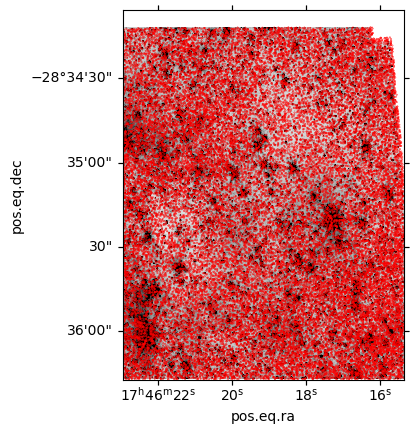

In [55]:
ax = plt.subplot(projection=cutout_405.wcs)
ax.imshow(cutout_405.data, origin='lower', cmap='Greys', vmin=0, vmax=25)
ax.scatter(basetable['skycoord_ref'].ra, basetable['skycoord_ref'].dec, transform=ax.get_transform('world'), s=0.1, edgecolor='r', facecolor='none')

# CMD

<Axes: xlabel='F187N - F405N', ylabel='F187N'>

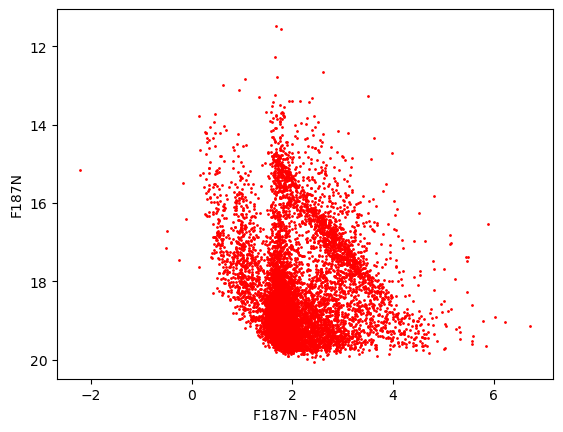

In [57]:
ax = plt.subplot(111)
cat_use_in.plot_CMD('f187n', 'f405n', 'f187n', ax=ax, color='r', s=1)

<Axes: xlabel='F212N - F466N', ylabel='F212N'>

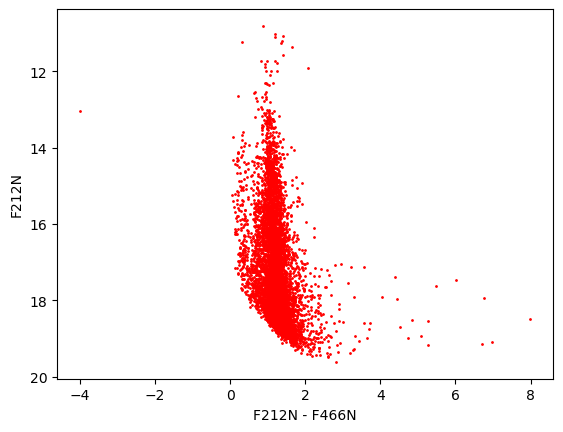

In [58]:
ax = plt.subplot(111)
cat_use_in.plot_CMD('f212n', 'f466n', 'f212n', ax=ax, color='r', s=1)

(-0.5, 2.0)

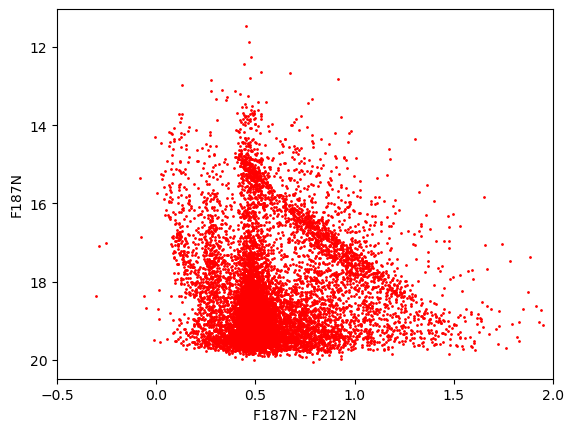

In [60]:
ax = plt.subplot(111)
cat_use_in.plot_CMD('f187n', 'f212n', 'f187n', ax=ax, color='r', s=1)
ax.set_xlim(-0.5, 2)

(-3.0, 5.471990983989685)

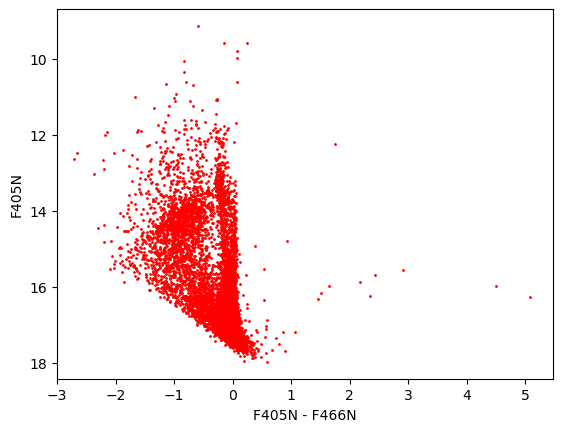

In [63]:
ax = plt.subplot(111)
cat_use_in.plot_CMD('f405n', 'f466n', 'f405n', ax=ax, color='r', s=1)
ax.set_xlim(-3)

(-3.0, 5.914124206582766)

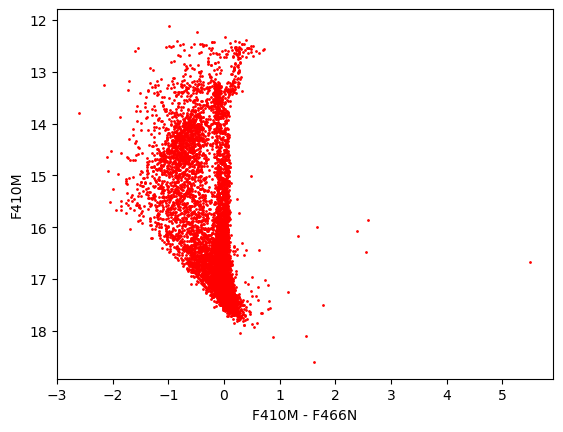

In [64]:
ax = plt.subplot(111)
cat_use_in.plot_CMD('f410m', 'f466n', 'f410m', ax=ax, color='r', s=1)
ax.set_xlim(-3)

(-3.0, 7.8492401258713835)

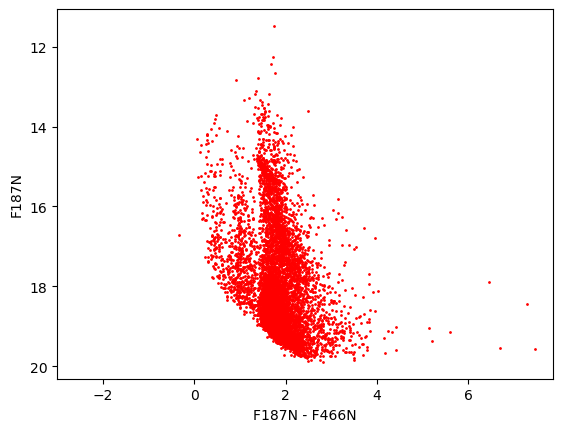

In [66]:
ax = plt.subplot(111)
cat_use_in.plot_CMD('f187n', 'f466n', 'f187n', ax=ax, color='r', s=1)
ax.set_xlim(-3)

<Axes: xlabel='F405N - F466N', ylabel='F212N - F466N'>

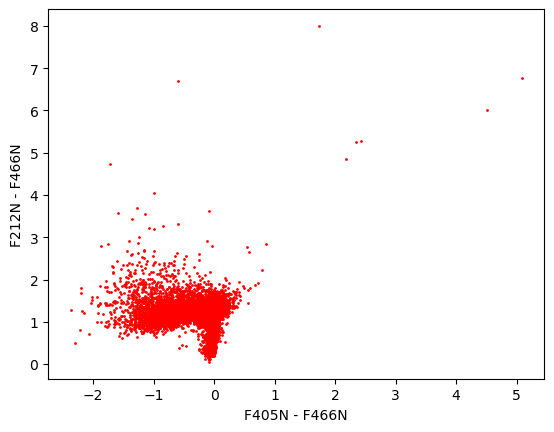

In [68]:
ax = plt.subplot(111)
cat_use_in.plot_CCD('f405n', 'f466n', 'f212n', 'f466n', ax=ax, color='r', s=1)

<Axes: xlabel='F410M - F466N', ylabel='F182M - F466N'>

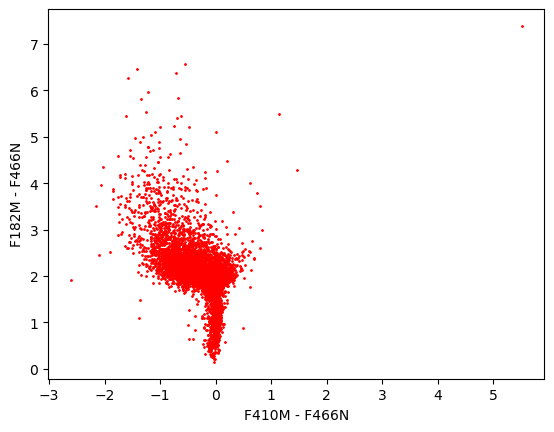

In [69]:
ax = plt.subplot(111)
cat_use_in.plot_CCD('f410m', 'f466n', 'f182m', 'f466n', ax=ax, color='r', s=1)

<Axes: xlabel='F410M - F466N', ylabel='F182M - F466N'>

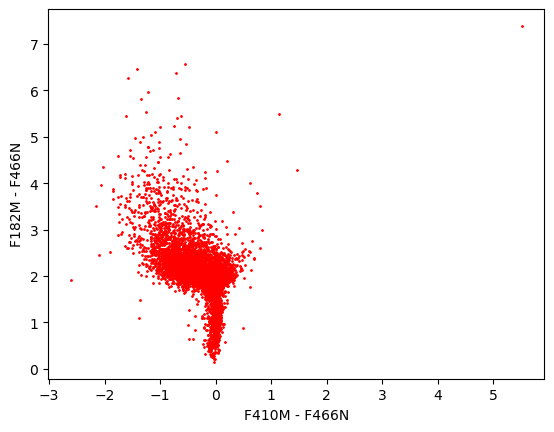

In [ ]:
ax = plt.subplot(111)
cat_use_in.plot_CCD('f410m', 'f466n', 'f182m', 'f466n', ax=ax, color='r', s=1)